In [52]:
import numpy as np
import tensorflow as tf
import torch
from os import listdir, mkdir, sep
from os.path import join, exists, splitext
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'torch'

In [4]:
def read_image(path, size=None, gray=False):
    img = cv2.imread(path)
    if gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if size != None:
        img = cv2.resize(img, size)
    return img

In [5]:
# Encoder 
VGG19 = tf.keras.applications.VGG19(include_top = False, weights='imagenet') # VGG19 encoder pretrained of Image Net dataset
VGG19.trainable = False

80142336/80134624 [==============================] - 8s 0us/step


In [6]:
VGG_layers = [
              'block1_conv1', 'block1_conv2', 'block1_pool', 
              'block2_conv1', 'block2_conv2', 'block2_pool',
              'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool',
              'block4_conv1'
              ]
              
Style_Error_layers = [
              'block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1'
]

In [7]:
Encoder = tf.keras.Model(
    inputs = [VGG19.input], 
    outputs = {
        name: VGG19.get_layer(name).output for name in VGG_layers
    },
    name='Encoder')
Encoder.trainable = False

In [8]:
content_image = read_image('../images/content/chicago.jpg')
style_image = read_image('../images/style/lion.jpg')

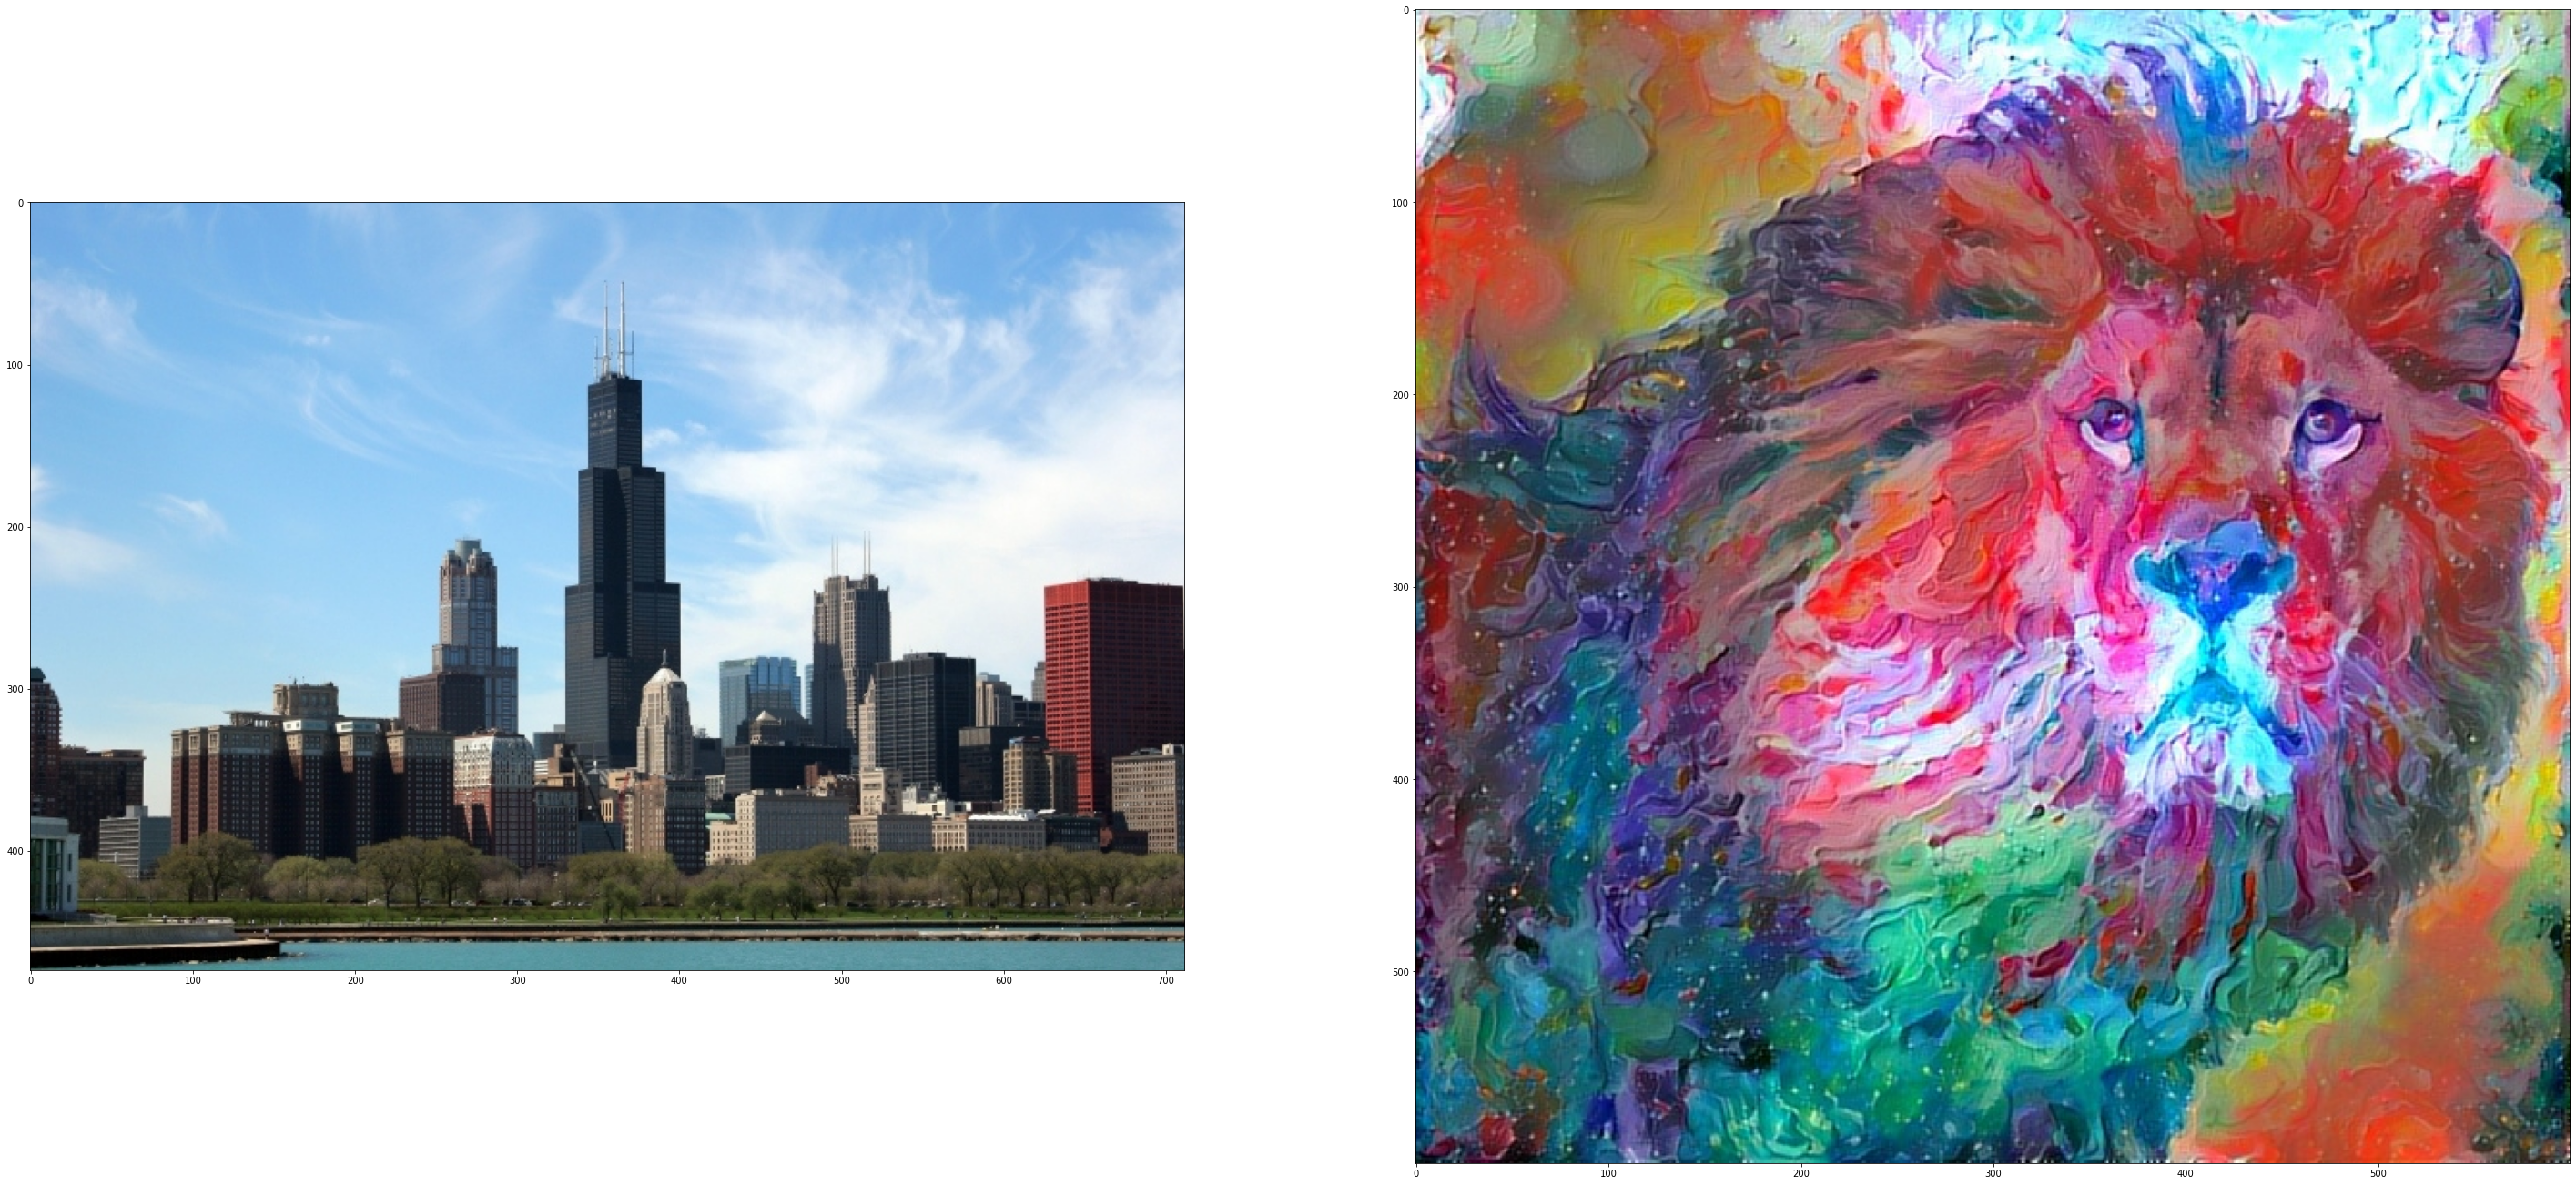

In [9]:
plt.figure(figsize=(50, 50))
plt.subplot(121)
plt.imshow(content_image)
plt.subplot(122)
plt.imshow(style_image)
plt.show()

In [41]:
content_image_t = tf.convert_to_tensor(content_image, dtype=tf.float32)
style_image_t = tf.convert_to_tensor(style_image, dtype=tf.float32)
content_image_t = tf.expand_dims(content_image, axis=0)
style_image_t = tf.expand_dims(style_image, axis=0)

In [42]:
content_encoded = Encoder(content_image_t)
style_encoded = Encoder(style_image_t)

In [51]:
for name in content_encoded:
    output = content_encoded[name]
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 474, 712, 64)
  min:  0.0
  max:  845.062
  mean:  26.155218

block1_conv2
  shape:  (1, 474, 712, 64)
  min:  0.0
  max:  2351.6738
  mean:  164.01024

block1_pool
  shape:  (1, 237, 356, 64)
  min:  0.0
  max:  2351.6738
  mean:  184.28194

block2_conv1
  shape:  (1, 237, 356, 128)
  min:  0.0
  max:  4001.7307
  mean:  150.20781

block2_conv2
  shape:  (1, 237, 356, 128)
  min:  0.0
  max:  6721.08
  mean:  116.05019

block2_pool
  shape:  (1, 118, 178, 128)
  min:  0.0
  max:  6721.08
  mean:  171.08849

block3_conv1
  shape:  (1, 118, 178, 256)
  min:  0.0
  max:  9479.599
  mean:  126.41353

block3_conv2
  shape:  (1, 118, 178, 256)
  min:  0.0
  max:  9835.609
  mean:  164.30768

block3_conv3
  shape:  (1, 118, 178, 256)
  min:  0.0
  max:  6993.879
  mean:  339.03857

block3_conv4
  shape:  (1, 118, 178, 256)
  min:  0.0
  max:  15074.065
  mean:  431.3577

block3_pool
  shape:  (1, 59, 89, 256)
  min:  0.0
  max:  15074.065
  mean:  612.5222

block4_